In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Healthcare'
industry_list = all_industries[sector]

In [35]:
print(industry_list)

['Biotechnology', 'Diagnostic Substances', 'Diagnostics & Research', 'Drug Delivery', 'Drug Manufacturers - Major', 'Drug Manufacturers - Other', 'Drug Manufacturers - Specialty & Generic', 'Drug Manufacturers-General', 'Drug Manufacturers-Specialty & Generic', 'Drug Related Products', 'Drugs - Generic', 'Health Care Plans', 'Health Information Services', 'Healthcare Plans', 'Home Health Care', 'Hospitals', 'Long-Term Care Facilities', 'Medical Appliances & Equipment', 'Medical Care', 'Medical Care Facilities', 'Medical Devices', 'Medical Distribution', 'Medical Instruments & Supplies', 'Medical Laboratories & Research', 'Medical Practitioners', 'Pharmaceutical Retailers', 'Specialized Health Services']


In [36]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'NVO', 'name': 'Novo Nordisk A/S', 'last_day_data_date': '2024-06-13', 'adjusted_close': 142.49, 'refund_1d': -0.77, 'refund_1d_p': -0.54, 'refund_5d': 0.09, 'refund_5d_p': 0.06, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 634877247488, 'earnings_share': 2.86, 'dividend_yield': 0.0096, 'sector': 'Healthcare', 'industry': 'Biotechnology', 'avgvol_1d': 2852959, 'avgvol_200d': 4515360.24}, {'code': 'BHVN', 'name': 'Biohaven Pharmaceutical Holding Co Ltd', 'last_day_data_date': '2024-06-13', 'adjusted_close': 33.41, 'refund_1d': -0.34, 'refund_1d_p': -1.01, 'refund_5d': -0.2, 'refund_5d_p': -0.6, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 2949832448, 'earnings_share': -6.9, 'dividend_yield': None, 'sector': 'Healthcare', 'industry': 'Biotechnology', 'avgvol_1d': 621888, 'avgvol_200d': 1250832.53}, {'code': 'RCUS', 'name': 'Arcus Biosciences Inc', 'last_day_data_date': '2024-06-13', 'adjusted_close': 17, 'refund_1d': 1.19, 'r

In [37]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

NVO
BHVN
RCUS
DNA
NUVB
ADCT
ATNM
CYBN
LCTX
ARMP
PLX
MAIA
CVM
ANVS
AEON
MTNB
CLDI
IGC
PTN
NNVC
AIM
PHGE
IBIO
NRXS
CANF
CUBT
SCPX
CHRO
OGEN
AZTR
TOVX
NBY
ANRO
SER
TMO
DHR


[08:14:33] HTTPSConnectionPool(host='eodhd.com', port=443): Max retries exceeded with url:            ]8;id=408887;file://d:\Anaconda\envs\tensorflow_env\lib\site-packages\eodhd\APIs\BaseAPI.py\BaseAPI.py]8;;\:]8;id=5136;file://d:\Anaconda\envs\tensorflow_env\lib\site-packages\eodhd\APIs\BaseAPI.py#50\50]8;;\
           /api/fundamentals//IQV?api_token=5cb671b0b4a790.35526238&fmt=json (Caused by                            
           ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001239FB83100>,                  
           'Connection to eodhd.com timed out. (connect timeout=None)'))                                           

IQV
A
MTD
WAT
LH
DGX
RVTY
CRL
QGEN
ENZ
VNRX
ZTS
TAK
HLN
TEVA
RDY
CTLT
ELAN
PRGO
PBH
BHC
AMRX
TARO
EBS
CPHI
YCBD
VEEV
SOLV
DOCS
EVH
TDOC
PHR
WEAV
MPLN
AMWL
OWLT
FOXO
UNH
ELV
CI
CVS
HUM
CNC
MOH
OSCR
NEUE
HCA
THC
UHS
DVA
FMS
EHC
CHE
SEM
AGL
AMN
NHC
USPH
BKD
MD
AUNA
CYH
EHAB
SNDA
CCEL
CCM
AMS
ATIP
RHE
CANOQ
PACS
ABT
SYK
BSX
MDT
EW
PHG
STE
ZBH
SNN
GMED
BIO
BIO-B
PEN
GKOS
INSP
ITGR
CNMD
AORT
AVNS
CATX
FNA
NVRO
SENS
BFLY
ZOM
ELMD
XTNT
MYO
ASXC
ALUR
RBOT
VAPO
VTAK
MCK
COR
CAH
OMI
BDX
ALC
RMD
WST
BAX
TFX
ATR
BLCO
STVN
HAE
NVST
WRBY
STXS
INFU
MLSS
RVP
BIPH
SSY
VRTX
REGN
MRNA
BNTX
ARGX
ALNY
BGNE
GMAB
RPRX
BMRN
INCY
UTHR
TECH
SRPT
INSM
LEGN
PCVX
ROIV
CERE
ASND
JAZZ
BPMC
RVMD
EXEL
HALO
CYTK
IONS
MDGL
SMMT
CRSP
BBIO
VKTX
KRYS
APLS
NUVL
ALPN
IBRX
IMVT
RNA
MRUS
CRNX
RARE
AXSM
DYN
ARWR
CORT
DNLI
FOLD
ACLX
GPCR
IDYA
SWTX
GERN
XENE
PTCT
MOR
RYTM
MLTX
AGIO
TGTX
APGE
ADMA
ACAD
NTLA
CLDX
CGON
IOVA
JANX
NVAX
FTRE
RXRX
KYMR
VCEL
BEAM
RCKT
VERA
IMCR
PTGX
ZLAB
MRVI
PROK
CPRX
ARVN
KROS
NAMS
SNDX
AKRO
HRMY
GLPG
B

In [38]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [39]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [40]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [41]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [42]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [43]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [44]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


BHVN has no Dividend Paid
RCUS has no debt data in database
DNA has no debt data in database
NUVB has no debt data in database
ADCT has no Dividend Paid
CYBN has no Dividend Paid
ARMP has no Dividend Paid
PLX has no debt data in database
MAIA has no debt data in database
CVM has no Dividend Paid
ANVS has no Dividend Paid
AEON Couldn't get FCF error
CLDI EBITDA Zero error
IGC has no Dividend Paid
NNVC has no Dividend Paid
AIM has no Dividend Paid
PHGE has no Dividend Paid
IBIO has no Dividend Paid
NRXS has no Dividend Paid
CANF has no Dividend Paid
CUBT has no debt data in database
SCPX has no debt data in database
CHRO has no debt data in database
OGEN has no debt data in database
AZTR has no Dividend Paid
TOVX has no Dividend Paid
NBY has no debt data in database
ANRO EBITDA Zero error
SER Share probably zero: float division by zero
ENZ has no Dividend Paid
HLN Couldn't get FCF error
CTLT has no Dividend Paid
ELAN has no Dividend Paid
TARO has no Dividend Paid
CPHI has no Dividend Pai

In [45]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

358
358
358
358
358


In [4]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

NameError: name 'Codelist' is not defined

In [4]:
df = pd.read_csv('Healthcare.csv')

In [6]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(30,'Debt'))
top_50s.append(positive_df.nlargest(30,'Dividend Yield'))
top_50s.append(positive_df.nlargest(30,'EPS Yield'))
top_50s.append(positive_df.nlargest(30,'FCF'))
worst_100s.append(positive_df.nlargest(75, 'Debt'))
worst_100s.append(positive_df.nsmallest(75, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(75, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(75, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [7]:
print(final_selection.shape)
print(final_selection)

(17, 5)
     Code       Debt  Dividend Yield  EPS Yield        FCF
1    FONR 0.00319840      0.04214622 0.07381086 0.09449035
5    UTMD 0.02151309      0.01721886 0.06367819 0.08016518
6    GMAB 0.02200089      0.01540766 0.04012036 0.27889948
8     RDY 0.04781197      1.08846720 3.42331288 1.55844991
9    OSUR 0.08262917      0.21139292 0.07479675 0.23877779
12   PINC 0.11842806      0.04281397 0.10844200 0.09261707
13    NVO 0.13595335      0.10547477 0.25700935 0.08795509
14   UTHR 0.13619339      0.00878151 0.09206861 0.07382353
29   SPOK 0.43444520      0.08242993 0.05308093 0.06926705
30  BIO-B 2.19835239     59.44960775 0.06587387 0.10956589
48   SIGA 0.81003756      0.10556723 0.12967290 0.10550771
50    FMS 2.14152243      0.08967697 0.07953496 0.17618581
52   QGEN 1.32749002      0.08843631 0.04698767 0.03752190
54   HOLX 2.54437810      0.08473640 0.04912776 0.05215435
73   COLL 1.25265251      0.05013512 0.08088614 0.24264573
75   MDRX 0.89872589      0.07391401 0.06207792 

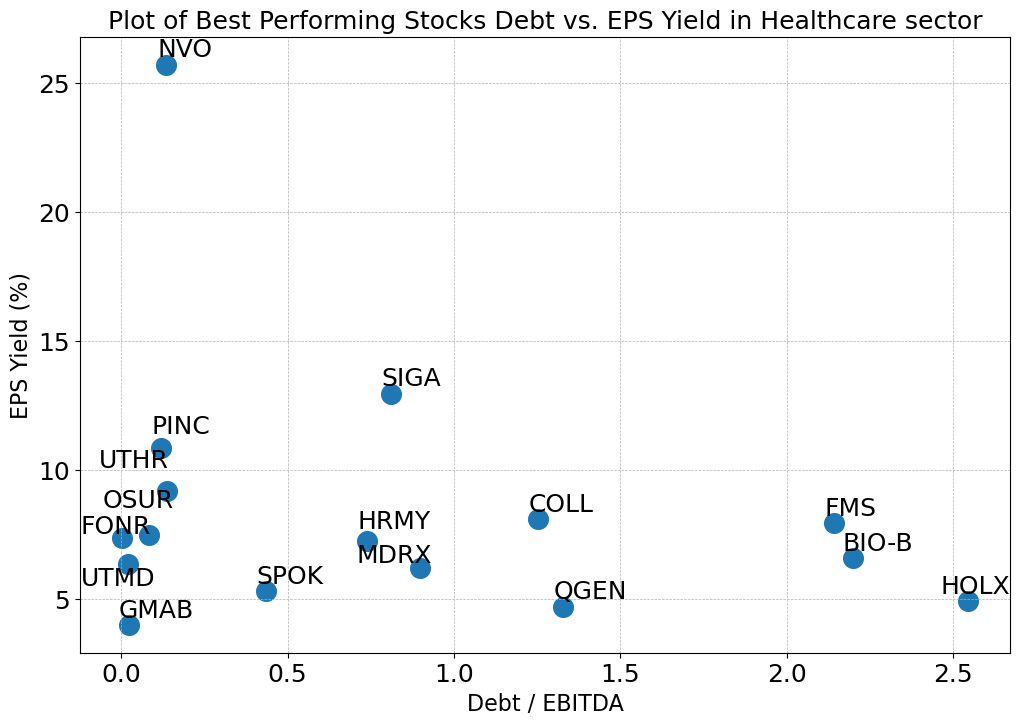

In [8]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield (%)',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

excluded_codes = ['RDY']
plot_data_1 = final_selection[~final_selection['Code'].isin(excluded_codes)]
scatter = plt.scatter(plot_data_1['Debt'], plot_data_1['EPS Yield']*100, s=200) 

texts = []
for i, row in plot_data_1.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield']*100, row['Code'], fontsize=18, ha='right'))

adjust_text(texts)

sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

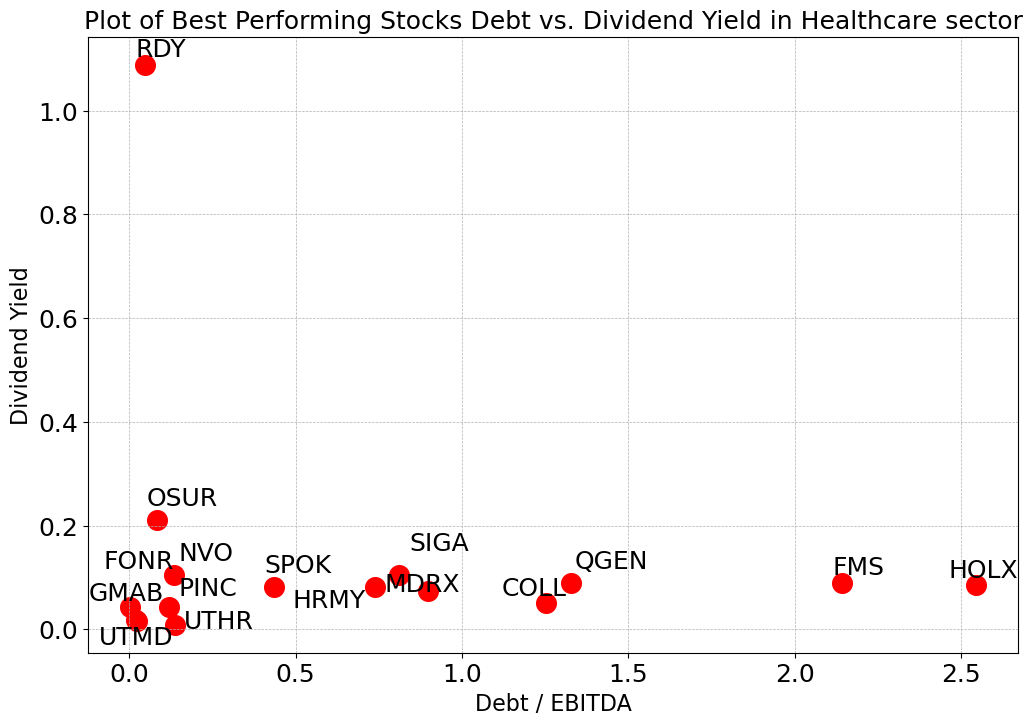

In [10]:
excluded_codes_1 = ['BIO-B']
plot_data_2 = final_selection[~final_selection['Code'].isin(excluded_codes_1)]

plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

scatter = plt.scatter(plot_data_2['Debt'], plot_data_2['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data_2.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

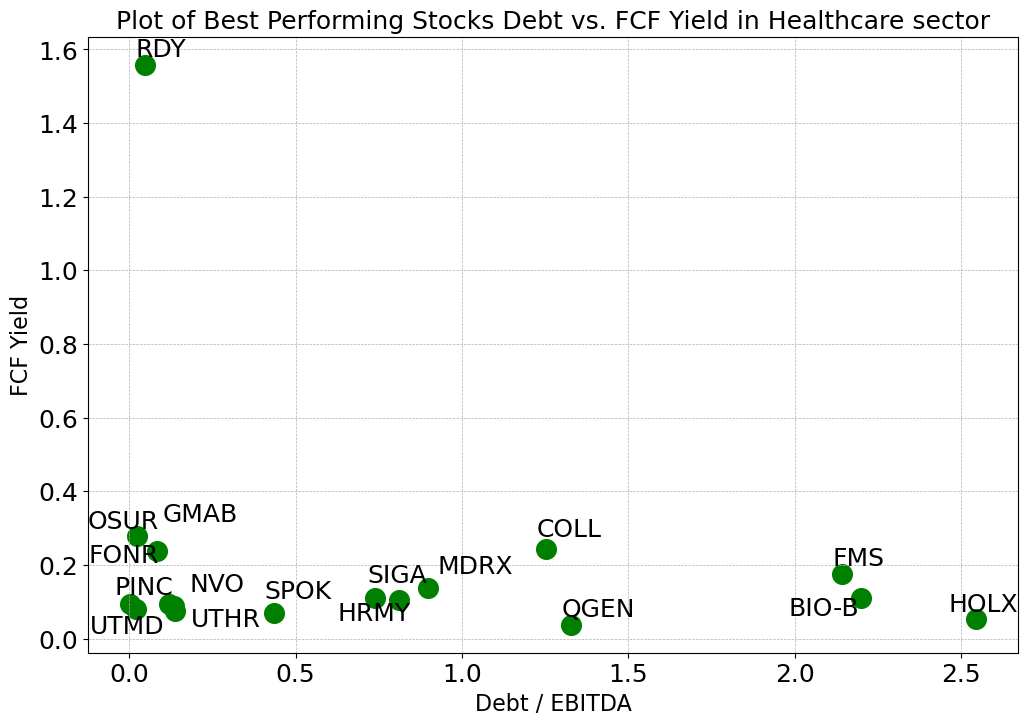

In [12]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(final_selection['Debt'], final_selection['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [10]:
today = '2024-06-03'
days_60 = '2024-04-08'
days_120 = '2024-02-06'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [98]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [99]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


FONR
UTMD
GMAB
RDY
OSUR
PINC
NVO
UTHR
SPOK
BIO-B
SIGA
FMS
QGEN
HOLX
COLL
MDRX
HRMY


In [100]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue


In [102]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.015571650422754865, 0.06644219182395666, 0.2362329220668307]


In [103]:
all_returns.append(GSPC_returns)

In [104]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [105]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

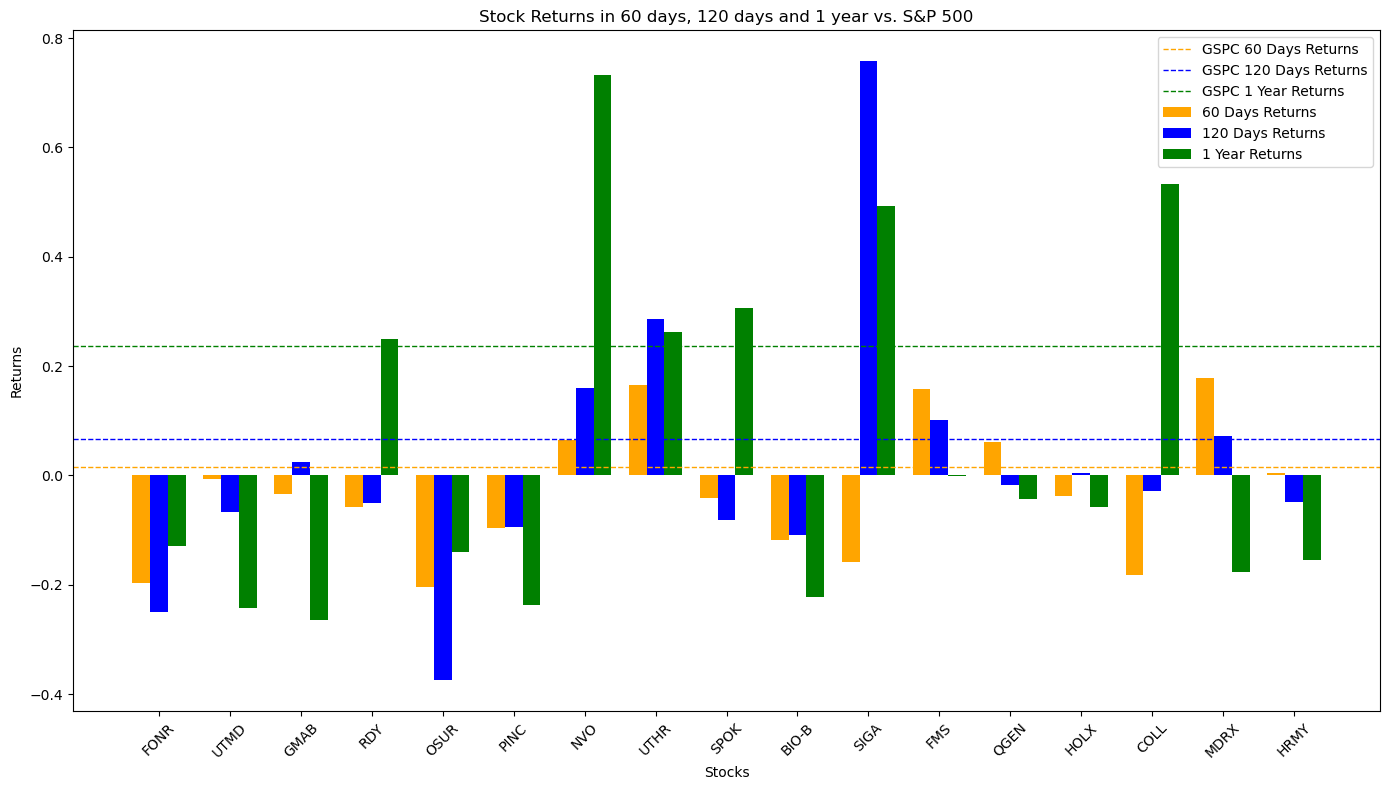

In [106]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [109]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is -2.94%
Return for Investing in S&P500 in 60 days is 1.56%
Return for Investing in Best-Stocks Portfolios in 120 days is 1.65%
Return for Investing in S&P500 in 120 days is 6.64%
Return for Investing in Best-Stocks Portfolios in 1 year is 5.34%
Return for Investing in S&P500 in 1 year is 23.62%


In [8]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

1      FONR
5      UTMD
6      GMAB
8       RDY
9      OSUR
12     PINC
13      NVO
14     UTHR
29     SPOK
30    BIO-B
48     SIGA
50      FMS
52     QGEN
54     HOLX
73     COLL
75     MDRX
78     HRMY
Name: Code, dtype: object


In [9]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []
excluded_code = 'BIO-B'
for s in code_list:
    if s == excluded_code:
        continue
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

BIO-B on 2023-06-12 error: list index out of range
BIO-B on 2023-06-20 error: list index out of range
BIO-B on 2023-06-26 error: list index out of range
BIO-B on 2023-07-03 error: list index out of range
BIO-B on 2023-07-10 error: list index out of range
BIO-B on 2023-07-24 error: list index out of range
BIO-B on 2023-07-31 error: list index out of range
BIO-B on 2023-08-07 error: list index out of range
BIO-B on 2023-08-14 error: list index out of range
BIO-B on 2023-08-21 error: list index out of range
BIO-B on 2023-08-28 error: list index out of range
BIO-B on 2023-09-05 error: list index out of range
BIO-B on 2023-09-11 error: list index out of range
BIO-B on 2023-09-25 error: list index out of range
BIO-B on 2023-10-09 error: list index out of range
BIO-B on 2023-10-16 error: list index out of range
BIO-B on 2023-10-23 error: list index out of range
BIO-B on 2023-10-30 error: list index out of range
BIO-B on 2023-11-06 error: list index out of range
BIO-B on 2023-11-13 error: list

In [15]:
print(api.get_eod_historical_stock_market_data(symbol = 'BIO-B', from_date= '2024-02-05', to_date= '2024-02-05'))

[]


In [16]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.01895615  0.03107227  0.00319192  0.01326049 -0.00235709
  0.0235497   0.03521461  0.06626572  0.07020014  0.0575955   0.040798
  0.04755797  0.03056026  0.03061096  0.01095569 -0.00283554 -0.00416562
  0.00291224 -0.03183943 -0.06795764 -0.0818256  -0.0442703  -0.02230193
  0.02974062  0.04774907  0.06007999  0.01990588  0.04235003  0.06263369
  0.0735804   0.06804435  0.05082998  0.05447046  0.06233167  0.03664438
  0.06718109  0.05969288  0.08554753  0.07065586  0.09348768  0.11953236
  0.11797461  0.11056863  0.10254516  0.05865691  0.05716725  0.07804396
  0.1052075   0.05188089  0.0613333   0.05806895  0.05343894]


In [17]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [18]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Healthcare Sector is:  0.04277595538581322


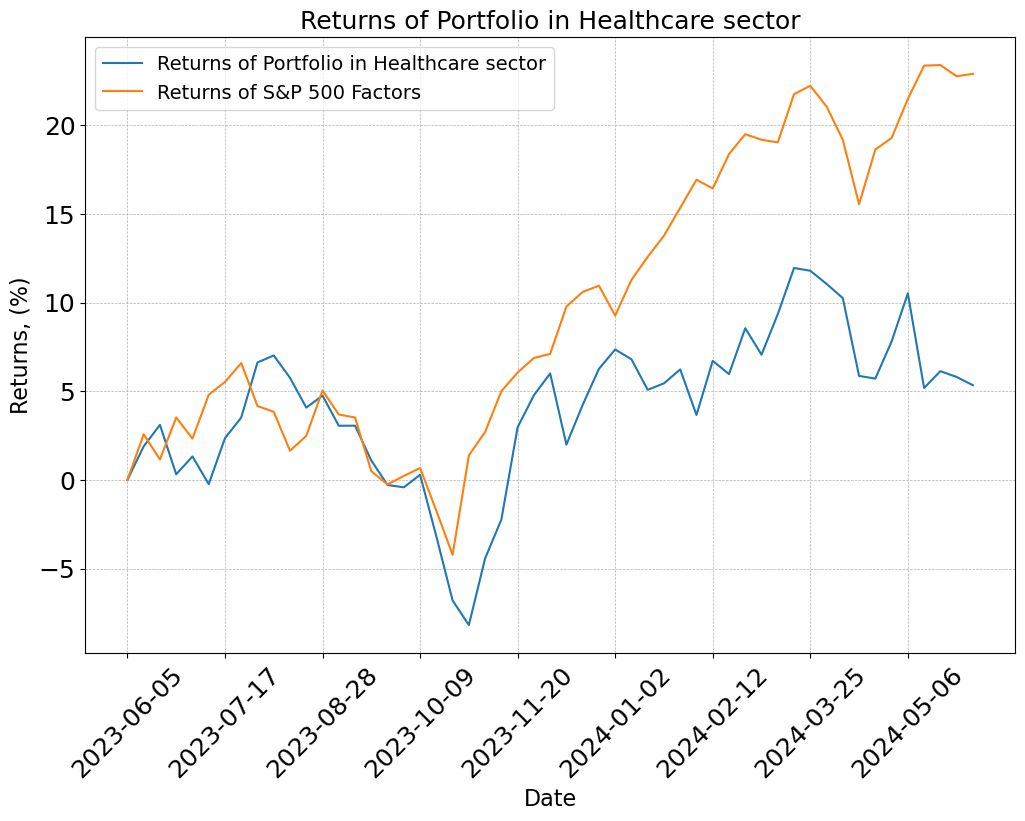

In [19]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()